# Mã hóa dữ liệu

## One hot encoding

In [10]:
import pandas as pd
import numpy as np
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
data = asarray([["red"], ["red"], ["yellow"], ["green"], ["yellow"]])
data

array([['red'],
       ['red'],
       ['yellow'],
       ['green'],
       ['yellow']], dtype='<U6')

In [2]:
type(data)

numpy.ndarray

In [3]:
encoder = OneHotEncoder(sparse=False)
onehot = encoder.fit_transform(data)
onehot

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [6]:
dm = ["red", "red", "yellow", "green", "yellow"]
sr = np.array(dm)
sr

array(['red', 'red', 'yellow', 'green', 'yellow'], dtype='<U6')

In [7]:
onehot = encoder.fit_transform(sr)
onehot

ValueError: Expected 2D array, got 1D array instead:
array=['red' 'red' 'yellow' 'green' 'yellow'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [8]:
sr = sr.reshape(-1,1)
sr

array([['red'],
       ['red'],
       ['yellow'],
       ['green'],
       ['yellow']], dtype='<U6')

In [9]:
onehot = encoder.fit_transform(sr)
onehot

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [11]:
ser = pd.Series(dm)
ser

0       red
1       red
2    yellow
3     green
4    yellow
dtype: object

In [12]:
ser.values

array(['red', 'red', 'yellow', 'green', 'yellow'], dtype=object)

In [13]:
onehot = encoder.fit_transform(ser.values.reshape(-1, 1))
onehot

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [22]:
df = ["red", "red", "yellow", "green", "yellow"]
df = pd.DataFrame(df, index = [1,2,3,4,5], columns = ["color"])
df

,color
1,red
2,red
3,yellow
4,green
5,yellow


In [24]:
onehot = encoder.fit_transform(df["color"].values.reshape(-1, 1))
onehot

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [23]:
# Encoding with pandas
pd.get_dummies(df)

,color_green,color_red,color_yellow
1,0,1,0
2,0,1,0
3,0,0,1
4,1,0,0
5,0,0,1


## Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

In [27]:
encoder = LabelEncoder()
lb = encoder.fit_transform(["red", "red", "yellow", "green", "yellow"])
lb

array([1, 1, 2, 0, 2], dtype=int64)

In [28]:
lb = encoder.fit_transform(df["color"].values)
lb

array([1, 1, 2, 0, 2])

In [30]:
# Label encoding with pandas
df["color"].dtype

dtype('O')

In [31]:
df["color"].astype("category").cat.codes

1    1
2    1
3    2
4    0
5    2
dtype: int8

## Ordinal Encoding

In [33]:
# Encoding with scikit-learn
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X = [["S", 1], ["M", 2], ["L", 3]]
enc.fit_transform(X)

array([[2., 0.],
       [1., 1.],
       [0., 2.]])

In [34]:
df = pd.DataFrame({"Score": ["Low", "Low", "Medium", "Medium", "High", "Low", "Medium", "High", "Low"]})
df

,Score
0,Low
1,Low
2,Medium
3,Medium
4,High
5,Low
6,Medium
7,High
8,Low


In [35]:
scale_mapper = {"Low": 1, "Medium": 2, "High": 3}
df["Scale"] = df["Score"].replace(scale_mapper)
df

,Score,Scale
0,Low,1
1,Low,1
2,Medium,2
3,Medium,2
4,High,3
5,Low,1
6,Medium,2
7,High,3
8,Low,1


# Rời rạc hóa dữ liệu

**Dùng hàm `cut`**

In [37]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]
pd.cut(ages, bins)

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [38]:
cut_data = pd.cut(ages, 4)
cut_data

[(19.959, 30.25], (19.959, 30.25], (19.959, 30.25], (19.959, 30.25], (19.959, 30.25], ..., (30.25, 40.5], (50.75, 61.0], (40.5, 50.75], (40.5, 50.75], (30.25, 40.5]]
Length: 12
Categories (4, interval[float64, right]): [(19.959, 30.25] < (30.25, 40.5] < (40.5, 50.75] < (50.75, 61.0]]

**Dùng hàm `qcut`**

In [39]:
cut_data = pd.qcut(ages, 4)
cut_data

[(19.999, 22.75], (19.999, 22.75], (22.75, 29.0], (22.75, 29.0], (19.999, 22.75], ..., (29.0, 38.0], (38.0, 61.0], (38.0, 61.0], (38.0, 61.0], (29.0, 38.0]]
Length: 12
Categories (4, interval[float64, right]): [(19.999, 22.75] < (22.75, 29.0] < (29.0, 38.0] < (38.0, 61.0]]

# Thực hành

In [41]:
genes = pd.read_csv("D:/DA2210R1/data/gene_expression.csv")
genes.head()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,...,G91,G92,G93,G94,G95,G96,G97,G98,G99,G100
0,0.096999,0.227366,0.431403,0.350564,0.614166,0.037278,0.608806,0.402018,0.024301,0.534258,...,0.520794,0.348856,0.648020,0.460299,0.422432,0.640388,0.238413,0.651695,0.536379,0.640927
1,0.140357,0.116043,0.498218,0.286252,0.708196,0.037699,0.645638,0.447637,0.031831,0.444297,...,0.609565,0.446938,0.655062,0.370700,0.522416,0.594598,0.209250,0.590257,0.561454,0.548147
2,0.075864,0.215462,0.245413,0.263025,0.695526,0.057789,0.659812,0.423609,0.005288,0.504874,...,0.720783,0.311021,0.637153,0.415287,0.405801,0.523387,0.278230,0.551977,0.588909,0.571148
3,0.081394,0.193503,0.561137,0.133510,0.657569,0.053319,0.534083,0.415155,0.010994,0.408166,...,0.670272,0.498790,0.549552,0.368304,0.392148,0.643276,0.351833,0.681212,0.554729,0.498315
4,0.146972,0.019467,0.520126,0.200362,0.289476,0.146236,0.522055,0.325684,0.009394,0.345423,...,0.656710,0.488208,0.530460,0.392846,0.365890,0.637134,0.240219,0.672030,0.520975,0.643914


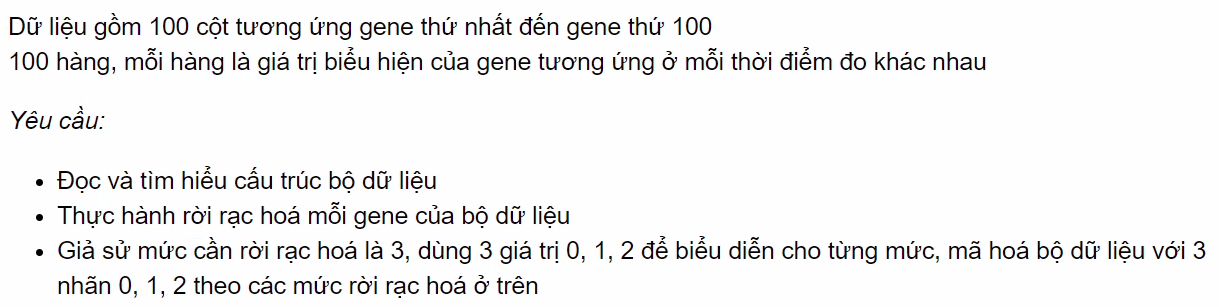

In [43]:
genes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G1      100 non-null    float64
 1   G2      100 non-null    float64
 2   G3      100 non-null    float64
 3   G4      100 non-null    float64
 4   G5      100 non-null    float64
 5   G6      100 non-null    float64
 6   G7      100 non-null    float64
 7   G8      100 non-null    float64
 8   G9      100 non-null    float64
 9   G10     100 non-null    float64
 10  G11     100 non-null    float64
 11  G12     100 non-null    float64
 12  G13     100 non-null    float64
 13  G14     100 non-null    float64
 14  G15     100 non-null    float64
 15  G16     100 non-null    float64
 16  G17     100 non-null    float64
 17  G18     100 non-null    float64
 18  G19     100 non-null    float64
 19  G20     100 non-null    float64
 20  G21     100 non-null    float64
 21  G22     100 non-null    float64
 22  G2

In [56]:
for i in genes.columns:
    cut_genes = pd.cut(genes[i], 3)
    encoder = LabelEncoder()
    lb = encoder.fit_transform(cut_genes.values)
    genes[i] = lb

In [60]:
genes

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,...,G91,G92,G93,G94,G95,G96,G97,G98,G99,G100
0,0,1,1,1,1,0,1,1,0,2,...,1,1,1,2,1,2,1,1,1,1
1,0,0,1,1,2,0,1,2,0,1,...,1,2,1,1,2,1,0,1,1,1
2,0,1,0,1,2,1,1,1,0,2,...,2,1,1,2,1,1,1,0,2,1
3,0,1,2,0,2,0,0,1,0,1,...,2,2,1,1,1,2,2,1,1,0
4,0,0,1,0,0,2,0,0,0,0,...,2,2,1,1,1,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,1,1,1,2,1,2,1,0,1,...,2,2,1,2,2,0,2,1,1,1
96,0,2,1,2,1,1,0,1,0,1,...,2,1,1,2,2,2,0,0,2,2
97,0,2,1,1,2,0,0,1,1,1,...,1,2,1,1,2,2,1,0,0,1
98,0,2,2,1,1,0,1,1,0,2,...,1,2,1,1,2,1,2,1,0,1
